In [114]:
# Importing  important libraries
import warnings
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold,cross_val_score

In [115]:
# Reading the given dataset and parsing the date on the fly.
df = pd.read_excel('hoteldata.xlsx',parse_dates=['DTS'])

In [3]:
# Showing sample of the data
df.sample(5)

,StoreCode,DTS,Shift,Day Type,Day,Month,Date,Year,Time,TicketCode,PartySize,MenuCateogry,MenuItem,ItemPrice,ItemQty
125,YALEV6B6K4,2019-01-02 12:05:00,Lunch,Weekend,Wednesday,1,2,2019,12:05PM,YALE0014,5,DESSERTS,GULABJAMUN,6.0,1
18,YALEV6B6K3,2019-01-01 11:50:00,Lunch,Weekday,Tuesday,1,1,2019,11:50AM,UBER001,na,BREADS,ONION KULCHA,5.0,2
12,YALEV6B6K3,2019-01-01 11:50:00,Lunch,Weekday,Tuesday,1,1,2019,11:50AM,YALE0003,2,BREADS,GARLIC NAAN,3.5,2
15,YALEV6B6K3,2019-01-01 11:50:00,Lunch,Weekday,Tuesday,1,1,2019,11:50AM,UBER001,na,Starter,COCKTAIL CHICKEN SAMOSAS,14.0,2
120,YALEV6B6K4,2019-01-02 12:05:00,Lunch,Weekend,Wednesday,1,2,2019,12:05PM,YALE0014,5,Starter,HARA BHARA KABOB,16.0,1


### What essential has been done in the following cells are :
#### 1. Replicating data for weekends in a month
#### 2. Replicating data for weekeday in a month
#### 3.  Combining weekday and weekend data for a month.
#### 4. Replicating data for one month into 6 months.

In [4]:
#Replicating data for first day of weekend
newdf1 = pd.DataFrame(np.repeat(df[df['Date']==1].values,4,axis=0))
newdf1.columns = df.columns
newdf1.shape


(476, 15)

In [5]:
newdf2 = pd.DataFrame(np.repeat(df[df['Date']==2].values,4,axis=0))
newdf2.columns = df.columns
newdf2.shape

(324, 15)

In [6]:
weekend_data_for_one_month = pd.concat([newdf1,newdf2])
weekend_data_for_one_month.shape

(800, 15)

In [7]:
weekend_data_for_one_month['Day']=weekend_data_for_one_month['Day'].apply(lambda x:str(x).replace('Tuesday','Friday').replace('Wednesday','Saturday'))

In [8]:
weekend_data_for_one_month['Day Type']=weekend_data_for_one_month['Day Type'].apply(lambda x:str(x).replace('Weekday','Weekend'))

In [9]:
weekend_data_for_one_month.head()

,StoreCode,DTS,Shift,Day Type,Day,Month,Date,Year,Time,TicketCode,PartySize,MenuCateogry,MenuItem,ItemPrice,ItemQty
0,YALEV6B6K3,2019-01-01 11:30:00,Lunch,Weekend,Friday,1,1,2019,11:30AM,YALE0001,4,Starter,GOBI MANCHURIAN,14,1
1,YALEV6B6K3,2019-01-01 11:30:00,Lunch,Weekend,Friday,1,1,2019,11:30AM,YALE0001,4,Starter,GOBI MANCHURIAN,14,1
2,YALEV6B6K3,2019-01-01 11:30:00,Lunch,Weekend,Friday,1,1,2019,11:30AM,YALE0001,4,Starter,GOBI MANCHURIAN,14,1
3,YALEV6B6K3,2019-01-01 11:30:00,Lunch,Weekend,Friday,1,1,2019,11:30AM,YALE0001,4,Starter,GOBI MANCHURIAN,14,1
4,YALEV6B6K3,2019-01-01 11:30:00,Lunch,Weekend,Friday,1,1,2019,11:30AM,YALE0001,4,Starter,TASTY FLATBREAD,11,1


In [10]:
week_data_dinner = pd.DataFrame(np.repeat(df[(df['Date']==1)&(df['Shift']=='Dinner')].values,22,axis=0))
week_data_dinner.columns = df.columns
week_data_dinner.sample(5)

,StoreCode,DTS,Shift,Day Type,Day,Month,Date,Year,Time,TicketCode,PartySize,MenuCateogry,MenuItem,ItemPrice,ItemQty
207,YALEV6B6K4,2019-01-01 19:00:00,Dinner,Weekday,Tuesday,1,1,2019,7:00PM,YALE0009,5,Starter,GOBI MANCHURIAN,14,2
566,YALEV6B6K4,2019-01-01 19:00:00,Dinner,Weekday,Tuesday,1,1,2019,7:00PM,YALE0009,5,DESSERTS,GULABJAMUN,6,2
948,YALEV6B6K4,2019-01-02 20:15:00,Dinner,Weekend,Wednesday,1,1,2019,8:30PM,UBER005,na,BREADS,NAAN,2.75,4
895,YALEV6B6K4,2019-01-02 20:15:00,Dinner,Weekend,Wednesday,1,1,2019,8:30PM,UBER005,na,BREADS,ONION KULCHA,5,2
777,YALEV6B6K4,2019-01-01 20:30:00,Dinner,Weekday,Tuesday,1,1,2019,8:30PM,UBER003,na,CHICKEN SPECIALS,BUTTER CHICKEN,18,3


In [11]:
week_data_lunch = pd.DataFrame(np.repeat(df[(df['Date']==1)&(df['Shift']=='Lunch')].values,5,axis=0))
week_data_lunch.columns = df.columns
week_data_lunch.shape

(365, 15)

In [12]:
weekday_data = pd.concat([week_data_lunch,week_data_dinner])
weekday_data['Day Type'] = weekday_data['Day Type'].apply(lambda x:str(x).replace('Weekend','Weekday'))
weekday_data.head()

,StoreCode,DTS,Shift,Day Type,Day,Month,Date,Year,Time,TicketCode,PartySize,MenuCateogry,MenuItem,ItemPrice,ItemQty
0,YALEV6B6K3,2019-01-01 11:30:00,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4,Starter,GOBI MANCHURIAN,14,1
1,YALEV6B6K3,2019-01-01 11:30:00,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4,Starter,GOBI MANCHURIAN,14,1
2,YALEV6B6K3,2019-01-01 11:30:00,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4,Starter,GOBI MANCHURIAN,14,1
3,YALEV6B6K3,2019-01-01 11:30:00,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4,Starter,GOBI MANCHURIAN,14,1
4,YALEV6B6K3,2019-01-01 11:30:00,Lunch,Weekday,Tuesday,1,1,2019,11:30AM,YALE0001,4,Starter,GOBI MANCHURIAN,14,1


In [13]:
whole_data_for_one_month = pd.concat([weekday_data,weekend_data_for_one_month])
whole_data_for_one_month.shape

(2177, 15)

In [14]:
whole_data_for_one_month['Day Type'].value_counts()

Weekday    1377
Weekend     800
Name: Day Type, dtype: int64

### Here we have final data for 6 months for each day whether its weekday or weekend.


In [15]:
final_df = pd.DataFrame(np.repeat(whole_data_for_one_month.values,6,axis=0))
final_df.columns = df.columns
final_df.sample(5)


,StoreCode,DTS,Shift,Day Type,Day,Month,Date,Year,Time,TicketCode,PartySize,MenuCateogry,MenuItem,ItemPrice,ItemQty
5207,YALEV6B6K4,2019-01-01 19:00:00,Dinner,Weekday,Tuesday,1,1,2019,7:00PM,YALE0009,5,BREADS,TANDOORI ROTI,2.75,2
3932,YALEV6B6K4,2019-01-01 19:00:00,Dinner,Weekday,Tuesday,1,1,2019,7:00PM,YALE0009,5,VEGETABLE SPECIALS,SARSON DA SAAG,15,1
8358,YALEV6B6K3,2019-01-01 11:30:00,Lunch,Weekend,Friday,1,1,2019,11:30AM,YALE0001,4,BREADS,GARLIC NAAN,3.5,2
7829,YALEV6B6K4,2019-01-02 20:15:00,Dinner,Weekday,Wednesday,1,1,2019,8:30PM,UBER005,na,BREADS,TANDOORI ROTI,2.75,1
7878,YALEV6B6K4,2019-01-02 20:15:00,Dinner,Weekday,Wednesday,1,1,2019,8:30PM,UBER005,na,BREADS,NAAN,2.75,4


### Data Cleaning and preprocessing

In [16]:
final_df['Day Type'].value_counts()

Weekday    8262
Weekend    4800
Name: Day Type, dtype: int64

In [ ]:
one_size = final_df.shape[0]//6
final_df.iloc[one_size:one_size+one_size]['Month'] = final_df.iloc[one_size:one_size+one_size]['Month'].apply(lambda x: str(x).replace('1','2'))
final_df.iloc[one_size*2:one_size*3]['Month'] = final_df.iloc[one_size*2:one_size*3]['Month'].apply(lambda x: str(x).replace('1','3'))
final_df.iloc[one_size*3:one_size*4]['Month'] = final_df.iloc[one_size*3:one_size*4]['Month'].apply(lambda x: str(x).replace('1','4'))
final_df.iloc[one_size*4:one_size*5]['Month'] = final_df.iloc[one_size*4:one_size*5]['Month'].apply(lambda x: str(x).replace('1','5'))
final_df.iloc[one_size*5:one_size*6]['Month'] = final_df.iloc[one_size*5:one_size*6]['Month'].apply(lambda x: str(x).replace('1','6'))


In [18]:
hotel_data = final_df.drop(['StoreCode','DTS','Day','Date','Year','Time','TicketCode'],1)

In [19]:
hotel_data['PartySize'].value_counts()

5     4440
na    3276
3     2580
2     1566
4     1200
Name: PartySize, dtype: int64

In [20]:
hotel_data['PartySize'] = hotel_data['PartySize'].apply(lambda x:str(x).replace('na','1'))

In [21]:
hotel_data['PartySize'].value_counts()

5    4440
1    3276
3    2580
2    1566
4    1200
Name: PartySize, dtype: int64

In [22]:
hotel_data.sample(3)

,Shift,Day Type,Month,PartySize,MenuCateogry,MenuItem,ItemPrice,ItemQty
6673,Dinner,Weekday,4,2,BREADS,NAAN,2.75,1
1703,Lunch,Weekday,1,1,VEGETABLE SPECIALS,KADAHI PANEER,16,2
341,Lunch,Weekday,1,2,CHICKEN SPECIALS,CHICKEN TIKKA MASALA,18,1


### Analysing variables of Data set Univariately

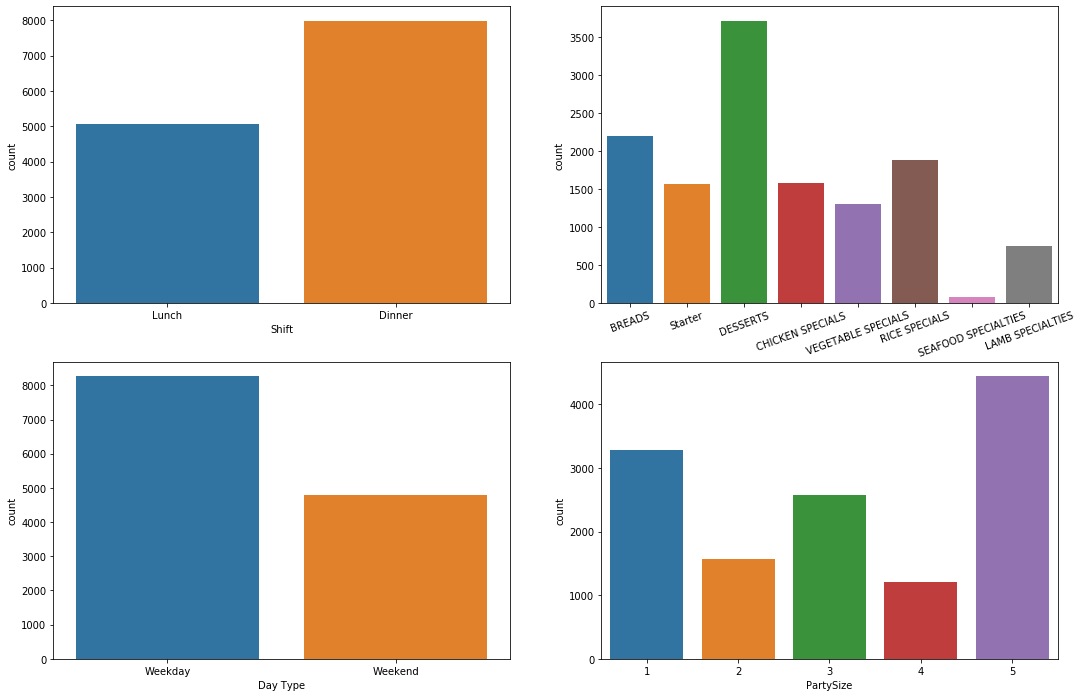

In [23]:
fig,ax = plt.subplots(2,2,figsize=(18,12))
sns.countplot(hotel_data.Shift,ax=ax[0][0])

g= sns.countplot('MenuCateogry',data=hotel_data,ax=ax[0][1])
g.set_xticklabels(hotel_data.MenuCateogry.value_counts().index,rotation=20)

sns.countplot('Day Type',data=hotel_data,ax=ax[1][0])
sns.countplot('PartySize',data=hotel_data,ax=ax[1][1])

plt.show()

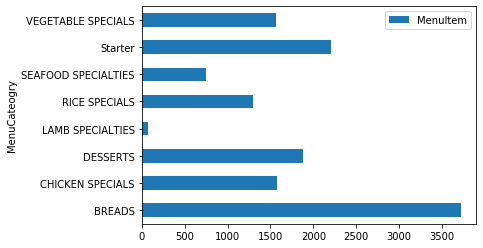

In [24]:
hotel_data.groupby('MenuCateogry').agg({'MenuItem':'count'}).plot.barh()

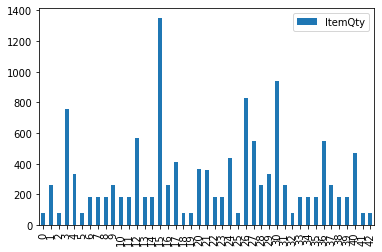

<Figure size 864x360 with 0 Axes>

In [25]:
hotel_data.groupby('MenuItem').agg({'ItemQty':'count'}).reset_index().plot.bar()
plt.figure(figsize=(12,5))
# f = sns.countplot(h['ItemQty'])
#f.set_xticklabels(h.MenuItem.value_counts().index,rotation=90)

plt.show()

In [26]:
hotel_data.head()

,Shift,Day Type,Month,PartySize,MenuCateogry,MenuItem,ItemPrice,ItemQty
0,Lunch,Weekday,1,4,Starter,GOBI MANCHURIAN,14,1
1,Lunch,Weekday,1,4,Starter,GOBI MANCHURIAN,14,1
2,Lunch,Weekday,1,4,Starter,GOBI MANCHURIAN,14,1
3,Lunch,Weekday,1,4,Starter,GOBI MANCHURIAN,14,1
4,Lunch,Weekday,1,4,Starter,GOBI MANCHURIAN,14,1


In [ ]:
hotel_data = hotel_data.drop(['PartySize','MenuCateogry'],1)
#hotel_data['Month'] = hotel_data['Month'].dt.month

In [29]:
hotel_data.sample(5)

,Shift,Day Type,Month,MenuItem,ItemPrice,ItemQty
5387,Dinner,Weekday,3,KHEER,7,1
4658,Dinner,Weekday,3,TIKKA RICE BOWL : PANEER | CHICKEN,18,2
11322,Lunch,Weekend,6,RASMALAI,6,2
7115,Dinner,Weekday,4,RICE,5,1
3933,Dinner,Weekday,2,SARSON DA SAAG,15,1


In [30]:
hotel_data_1 = hotel_data.drop(['MenuItem','ItemPrice'],1)
hotel_data_1.head()

,Shift,Day Type,Month,ItemQty
0,Lunch,Weekday,1,1
1,Lunch,Weekday,1,1
2,Lunch,Weekday,1,1
3,Lunch,Weekday,1,1
4,Lunch,Weekday,1,1


In [31]:
hotel_data_2 = hotel_data.drop(['ItemPrice','ItemQty'],1)
hotel_data_2.head()

,Shift,Day Type,Month,MenuItem
0,Lunch,Weekday,1,GOBI MANCHURIAN
1,Lunch,Weekday,1,GOBI MANCHURIAN
2,Lunch,Weekday,1,GOBI MANCHURIAN
3,Lunch,Weekday,1,GOBI MANCHURIAN
4,Lunch,Weekday,1,GOBI MANCHURIAN


### Now we have two data sets foe hotel_data_1 we need to create regression model
### for Second data set we have to find what is more probable to get ordered classification model.

In [32]:
hotel_data_1.head()

,Shift,Day Type,Month,ItemQty
0,Lunch,Weekday,1,1
1,Lunch,Weekday,1,1
2,Lunch,Weekday,1,1
3,Lunch,Weekday,1,1
4,Lunch,Weekday,1,1


In [33]:
le = LabelEncoder()
hotel_data_1['Shift'] = le.fit_transform(hotel_data_1['Shift'].values)
hotel_data_1['Day Type'] = le.fit_transform(hotel_data_1['Day Type'].values)
hotel_data_1.head()

,Shift,Day Type,Month,ItemQty
0,1,0,1,1
1,1,0,1,1
2,1,0,1,1
3,1,0,1,1
4,1,0,1,1


In [34]:
X = hotel_data_1.drop(['ItemQty'],1)
y=  hotel_data_1['ItemQty']

x_train, x_test, y_train, y_test = train_test_split(X,y, test_size =0.3, random_state = 0)


In [69]:
## For 1st Data set
## Fitting the model
lin_reg = LinearRegression()
model_reg = lin_reg.fit(x_train,y_train)

In [70]:
model_reg.score(x_train,y_train)

0.02725836130872139

In [71]:
model_reg.score(x_test,y_test)

0.02797483608489837

In [72]:
ypred = model_reg.predict(x_test)
np.round(ypred)
## GEtting the predicted values.

array([19., 22., 19., ..., 18., 22., 22.])

In [73]:
y_test

9485     22
2200     14
10766     7
4981     15
3270     21
         ..
8818      8
8594     17
170      26
3583     37
3090     26
Name: MenuItem, Length: 3919, dtype: int32

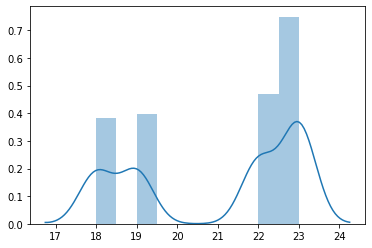

In [74]:
sns.distplot(np.round(ypred))

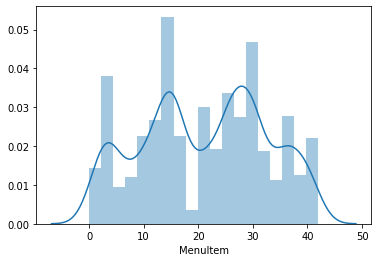

In [75]:
sns.distplot(y_test)

### We have chosen simple Linear regression as our Baseline modelfor our regression model due to less complexity . 

In [45]:
le = LabelEncoder()
hotel_data_2['Shift'] = le.fit_transform(hotel_data_2['Shift'].values)
hotel_data_2['Day Type'] = le.fit_transform(hotel_data_2['Day Type'].values)
hotel_data_2['MenuItem'] = le.fit_transform(hotel_data_2['MenuItem'].values)

hotel_data_2.head()
X = 

,Shift,Day Type,Month,MenuItem
0,1,0,1,16
1,1,0,1,16
2,1,0,1,16
3,1,0,1,16
4,1,0,1,16


In [57]:
X_cls = hotel_data_2.drop(['MenuItem'],1)
y_cls=  hotel_data_2['MenuItem']


In [58]:


models = []

models.append(('RF',RandomForestClassifier()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))


results = []
names = []
x=0
c=0
for name, model in models:
   warnings.simplefilter("ignore")
   c=0
   kfold = KFold(n_splits=50, random_state=0)
   cv_results = cross_val_score(model, X_cls, y_cls, cv=kfold, scoring="accuracy")
   results.append(cv_results)
   names.append(name)
   print(name,cv_results.mean(), cv_results.std())

RF 0.038789155040800216 0.05847968991138033
KNN 0.037759059401596906 0.09723526696697012
CART 0.04453628147758181 0.08530592078645491


### After comparing we can see that Random Forest is behaving fine with least standard deviation thus choosing Random Forest as the Baseline Model.

In [61]:
X_train,X_test,Y_train,Y_test=train_test_split(X_cls,y_cls,test_size=0.3,random_state=0)

clf = RandomForestClassifier()
clf.fit(X_train, Y_train)

y_pred = clf.predict(X_test)
le.inverse_transform(y_pred)

array(['BUTTER CHICKEN', 'TASTY FLATBREAD', 'BUTTER CHICKEN', ...,
       'GARLIC NAAN', 'TASTY FLATBREAD', 'TASTY FLATBREAD'], dtype=object)

### Here we are just checking with self created data frame and printing the required result.

In [111]:
## Creating test data
test_frame = pd.DataFrame({'Shift':['Lunch','Dinner','Dinner'],'DayType':['Weekend','WeekDay','Weekend'],'Month':['7','7','7']})
test_frame['Shift'] = test_frame['Shift'].apply(lambda x:1 if x=='Lunch' else 0)
test_frame['DayType']= test_frame['DayType'].apply(lambda x:0 if x=='WeekDay' else 1)
test_frame


,Shift,DayType,Month
0,1,1,7
1,0,0,7
2,0,1,7


In [112]:
test_frame.shape

(3, 3)

In [113]:
item_quantity = []
menu_item=[]
for i in range(test_frame.shape[0]):
    item_quantity.append(np.round(model_reg.predict(test_frame.iloc[[i]])))
    menu_item.append(le.inverse_transform(clf.predict(test_frame.iloc[[i]])))
    
pd.DataFrame({'MenuItem':menu_item,'Item_Quantity':item_quantity})
    

,MenuItem,Item_Quantity
0,[GARLIC NAAN],[20.0]
1,[NAAN],[24.0]
2,[GARLIC NAAN],[23.0]



### Random Forest has been Chosen from Logistic ,Decision Tree and KNN . Now the reason being it will train the data and will be able to classify accurately with High Precision and High Recall and Less Variance Error.

### Reducing MultiCollinearity ,Autocollinearity ,selecting features based on the pvalues are the impactful measures. Feature Engineering and extraction for Selection.

### Key Risks are:

#### 1.Data Leaks .
#### 2.Standaridisation and Transformation can lead to information loss.
#### 3.Feature selection and Hypothesis testing or statistical analysis are missing.
#### 4. Assumptions has been made.
